Geocoding and Mapping Two Datasets: Pineapple Production by Country and Population by Country Surveyed Who Like Pineapple Pizza

Datasets can be found here: 
https://www.kaggle.com/datasets/tomhudsonds/pineapple-pizza-countries
https://www.kaggle.com/datasets/mathurinache/list-of-countries-by-pineapple-production

Note that the datasets are being treated as dummy data based on the sources (lack thereof).
Objective: effectively clean data for geocoding and plotting multiple datasets onto the same map.

In [1138]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/A-Bin1/Data-Science-Misc/main/List_of_countries_by_pineapple_production.csv'
url2 = 'https://raw.githubusercontent.com/A-Bin1/Data-Science-Misc/main/pineapple_pizza_countries.csv'
pinpizzadf = pd.read_csv(url2)
pineapple_df = pd.read_csv(url1)

In [418]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import folium
import mapclassify

In [1139]:
pinpizzadf.head()

,Country,Percent of populatation that like pinaple pizza
0,Finland,0.13
1,Denmark,0.18
2,Norway,0.09
3,Iceland,0.09
4,Netherlands,0.09


In [1140]:
#rename the column
pinpizzadf.rename(columns={'Percent of populatation that like pinaple pizza': 'Population%'}, inplace=True)

In [1141]:
pinpizzadf.head()

,Country,Population%
0,Finland,0.13
1,Denmark,0.18
2,Norway,0.09
3,Iceland,0.09
4,Netherlands,0.09


In [1142]:
pineapple_df.head()

,Rank,Country,2017,2016
0,1,Costa Rica,3056445,2930661
1,2,Philippines,2671711,2612474
2,3,Brazil,2253897,2695230
3,4,Thailand,2123177,1778439
4,5,India,1861000,1924000


The country names need to be renamed to match the country names of the default datasets used to create the maps.

In [1143]:
#iterate to check and match country name to naturalearth_lowres dataset
from difflib import SequenceMatcher
import numpy as np
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def unpacklist(listname):
    newlist = []
    for l in listname:
        for i in l:
            newlist.append(i)
    return newlist


def modifyCountryNames(data, col, mapdata, ratio):
    countrylist = mapdata
    dflist = data[col]
    dfcountrylist = []
    for country in countrylist:
        newname =  dflist.loc[dflist.apply(lambda x:SequenceMatcher(None,country,x).ratio() > ratio)]
        dfcountrylist.append(newname)
    dfcountryrevlist = unpacklist(dfcountrylist)
    return dfcountryrevlist

C:\Users\alexa\AppData\Local\Temp\ipykernel_27204\194369269.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [1144]:
pinlist = modifyCountryNames(pinpizzadf, 'Country', world['name'], 0.85)
pinprodlist = modifyCountryNames(pineapple_df, 'Country', world['name'], 0.84)

len(pinpizzadf) == len(pinlist) & len(pineapple_df) == len(pinprodlist)

False

In [1145]:
print(len(pinpizzadf), len(pinlist))

156 144


In [1146]:
print(len(pineapple_df), len(pinprodlist))

31 28


The lists are still not the right lengths to append to the dataframe and use for replacement. They need to also be resorted and further manually updated.

In [1148]:
d = {v:i for i,v in enumerate(pineapple_df['Country'])}
pinprodlist.sort(key=d.get)
newset = set(pinprodlist)
dfset = set(pineapple_df['Country'])
missing = list(sorted(dfset - newset))
added = list(sorted(newset - dfset))

print('missing:', missing)
print('added:', added)

missing: ['Democratic Republic of the Congo', 'Dominican Republic', 'United States']
added: []


In [1149]:
us_wi = world.name.loc[world.name.str.contains('States')]
us_i = pineapple_df.Country.loc[pineapple_df.Country.str.contains('States')]
drc_wi = world.name.loc[world.name.str.contains('Dem.')]
drc_i = pineapple_df.Country.loc[pineapple_df.Country.str.contains('Congo')]
dmc_wi = world.name.loc[world.name.str.contains('Domin')]
dmc_i =pineapple_df.Country.loc[pineapple_df.Country.str.contains('Domin')]

In [1150]:
replace_values = {dmc_i.iat[0]:dmc_wi.iat[0], drc_i.iat[0]:drc_wi.iat[0], us_i.iat[0]:us_wi.iat[0]}
pineapple_df.Country = pineapple_df.Country.replace(replace_values)

In [1151]:
pineapple_df

,Rank,Country,2017,2016
0,1,Costa Rica,3056445,2930661
1,2,Philippines,2671711,2612474
2,3,Brazil,2253897,2695230
3,4,Thailand,2123177,1778439
4,5,India,1861000,1924000
5,6,Indonesia,1810986,1396153
6,7,Nigeria,1642376,1578090
7,8,China,1576405,1550947
8,9,Colombia,1091042,980082
9,10,Mexico,945210,875839


Find, replace, and add to the other dataframe column of country names.

In [1152]:
d = {v:i for i,v in enumerate(pinpizzadf['Country'])}
pinlist.sort(key=d.get)
newset = set(pinlist)
dfset = set(pinpizzadf['Country'])
missing = list(sorted(dfset - newset))
added = list(sorted(newset - dfset))

print('missing:', missing)
print('added:', added)

missing: ['Bahrain', 'Bosnia and Herzegovina', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Czech Republic', 'Dominican Republic', 'Eswatini', 'Hong Kong', 'Ivory Coast', 'Malta', 'Mauritius', 'Northern Cyprus', 'Palestinian Territories', 'Singapore', 'South Sudan']
added: []


In [1156]:
bzh_i = pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Bosn')]
bzh_wi = world.name.loc[world.name.str.contains('Bosn')]
drc_i = pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Congo')]
drc_wi = world.name.loc[world.name.str.contains('Dem.')]
czh_i =pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Czech')]
czh_wi = world.name.loc[world.name.str.contains('Czech')]
dmr_i =pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Domin')]
dmr_wi = world.name.loc[world.name.str.contains('Domin')]
cyp_i =pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Northern Cyprus')]
cyp_wi = world.name.loc[world.name.str.contains('N. Cy')]
pal_i =pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Pales')]
pal_wi = world.name.loc[world.name.str.contains('Pales')]
ssd_i =pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Sudan')]
ssd_wi = world.name.loc[world.name.str.contains('S. Sud')]
trn_i = pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Trin')]
trn_wi = world.name.loc[world.name.str.contains('Trin')]
car_wi = world.name.loc[world.name.str.contains('Central')]
car_i = pinpizzadf.Country.loc[pinpizzadf.Country.str.contains('Central')]



In [1154]:
replace_values = {bzh_i.iat[0]:bzh_wi.iat[0], drc_i.iat[0]:drc_wi.iat[0],
                  czh_i.iat[0]:czh_wi.iat[0], dmr_i.iat[0]:dmr_wi.iat[0],
                  cyp_i.iat[0]:cyp_wi.iat[0],
                  pal_i.iat[0]:pal_wi.iat[0],
                  ssd_i.iat[0]:ssd_wi.iat[0],
                  trn_i.iat[0]:trn_wi.iat[0],
                  car_i.iat[0]:car_wi.iat[0]}
pinpizzadf.Country = pinpizzadf.Country.replace(replace_values)

In [1157]:
#bahrain, eswatini, ivory coast, hong kong, malta, Mauritius, Singapore   not in dataset - remove
#congo is represented multiple times, delete one
dellist = ['Congo (Kinshasa)','Bahrain', 'Comoros', 'Eswatini', 'Hong Kong', 'Ivory Coast', 'Malta', 'Mauritius', 'Singapore', 'Cyprus']
pinpizzadf.drop(pinpizzadf.loc[pinpizzadf['Country'].isin(dellist)].index, axis=0, inplace=True)

In [1160]:
pinpizzadf = pinpizzadf.reset_index(drop=True)

For general EDA purposes, we have time series and an unknown date for the presumed pineapple pizza survey data. I'll take the average of the two years to remove the time series element of the pineapple production data so the sets are more uniform.

In [1161]:
pineapple_df['Avg'] = (pineapple_df['2016'] + pineapple_df['2017'])/2
pineapple_df['Avg'] = pineapple_df['Avg'].astype(int)

In [1162]:
pineapple_df.head()

,Rank,Country,2017,2016,Avg
0,1,Costa Rica,3056445,2930661,2993553
1,2,Philippines,2671711,2612474,2642092
2,3,Brazil,2253897,2695230,2474563
3,4,Thailand,2123177,1778439,1950808
4,5,India,1861000,1924000,1892500


Convert Country Names to geographical coordinates to map both datasets.

In [889]:
#https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(ctry):
    try:
        cn_a2_code =  country_name_to_country_alpha2(ctry)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

#function to get longitude and latitude data from country name
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [890]:
#convert column of countries to appropriate codes and coordinates and update dataframe (geocoding)
def get_geo_df(data, col):
  codes_list = [get_continent(x) for x in data[col]]
  data['new'] = codes_list
  new_col_list = ['Country_in' ,'Continent']
  for n,c in enumerate(new_col_list):
    data[c] = data['new'].apply(lambda new: new[n])
  coords_list = [geolocate(x) for x in data['Country_in']]
  coordcol_list = ['Latitude' ,'Longitude']
  data['coords'] = coords_list
  for n,c in enumerate(coordcol_list):
    data[c] = data['coords'].apply(lambda coords: coords[n])
  return data

In [1163]:
geo_pineapple_df = get_geo_df(pineapple_df, 'Country')

In [1164]:
geo_pineapple_df.head()

,Rank,Country,2017,2016,Avg,new,Country_in,Continent,coords,Latitude,Longitude
0,1,Costa Rica,3056445,2930661,2993553,"(CR, NA)",CR,NA,"(9.536456900000001, -84.17566257468567)",9.536457,-84.175663
1,2,Philippines,2671711,2612474,2642092,"(PH, AS)",PH,AS,"(12.7503486, 122.7312101)",12.750349,122.731210
2,3,Brazil,2253897,2695230,2474563,"(BR, SA)",BR,SA,"(25.6440845, 85.906508)",25.644085,85.906508
3,4,Thailand,2123177,1778439,1950808,"(TH, AS)",TH,AS,"(19.9781573, 105.4816107)",19.978157,105.481611
4,5,India,1861000,1924000,1892500,"(IN, AS)",IN,AS,"(40.3270127, -86.1746933)",40.327013,-86.174693


In [1165]:
#clean up the dataset
geo_pineapple_df = pd.DataFrame(geo_pineapple_df, columns = ['Rank', 'Country', 'Avg', 'Country_in', 'Continent', 'Latitude', 'Longitude'])
geo_pineapple_df.head()

,Rank,Country,Avg,Country_in,Continent,Latitude,Longitude
0,1,Costa Rica,2993553,CR,NA,9.536457,-84.175663
1,2,Philippines,2642092,PH,AS,12.750349,122.731210
2,3,Brazil,2474563,BR,SA,25.644085,85.906508
3,4,Thailand,1950808,TH,AS,19.978157,105.481611
4,5,India,1892500,IN,AS,40.327013,-86.174693


In [1166]:
#same for the pineapple pizza df
geo_pinpizzadf = get_geo_df(pinpizzadf, 'Country')

In [1167]:
geo_pinpizzadf.head()

,Country,Population%,new,Country_in,Continent,coords,Latitude,Longitude
0,Finland,0.13,"(FI, EU)",FI,EU,"(38.0452481, -100.8199963)",38.045248,-100.819996
1,Denmark,0.18,"(DK, EU)",DK,EU,"(38.8790615, -97.1893341)",38.879061,-97.189334
2,Norway,0.09,"(NO, EU)",NO,EU,"(61.1529386, 8.7876653)",61.152939,8.787665
3,Iceland,0.09,"(IS, EU)",IS,EU,"(41.64950915, 14.208061831039291)",41.649509,14.208062
4,Netherlands,0.09,"(NL, EU)",NL,EU,"(53.8217327, -61.2295532)",53.821733,-61.229553


In [1168]:
#clean the data
geo_pinpizzadf = pd.DataFrame(geo_pinpizzadf, columns = ('Country', 'Population%', 'Country_in', 'Continent', 'Latitude', 'Longitude'))
geo_pinpizzadf

,Country,Population%,Country_in,Continent,Latitude,Longitude
0,Finland,0.13,FI,EU,38.045248,-100.819996
1,Denmark,0.18,DK,EU,38.879061,-97.189334
2,Norway,0.09,NO,EU,61.152939,8.787665
3,Iceland,0.09,IS,EU,41.649509,14.208062
4,Netherlands,0.09,NL,EU,53.821733,-61.229553
...,...,...,...,...,...,...
141,Rwanda,0.57,RW,AF,-1.964663,30.064436
142,Tanzania,0.57,TZ,AF,36.496602,3.470390
143,Afghanistan,0.60,AF,AS,11.710821,41.033087
144,Central African Rep.,0.63,Unknown,Unknown,25.029422,-77.361956


In [1169]:
geo_pizzadf = gpd.GeoDataFrame(
    geo_pinpizzadf, geometry=gpd.points_from_xy(geo_pinpizzadf.Longitude, geo_pinpizzadf.Latitude), crs="EPSG:4327"
)
geo_pinproddf = gpd.GeoDataFrame(
    geo_pineapple_df, geometry=gpd.points_from_xy(geo_pineapple_df.Longitude, geo_pineapple_df.Latitude), crs="EPSG:4327"
)

In [1170]:
geo_pizzadf.head()

,Country,Population%,Country_in,Continent,Latitude,Longitude,geometry
0,Finland,0.13,FI,EU,38.045248,-100.819996,POINT (-100.82000 38.04525)
1,Denmark,0.18,DK,EU,38.879061,-97.189334,POINT (-97.18933 38.87906)
2,Norway,0.09,NO,EU,61.152939,8.787665,POINT (8.78767 61.15294)
3,Iceland,0.09,IS,EU,41.649509,14.208062,POINT (14.20806 41.64951)
4,Netherlands,0.09,NL,EU,53.821733,-61.229553,POINT (-61.22955 53.82173)


Plot the countries on a map by country name with custom color.

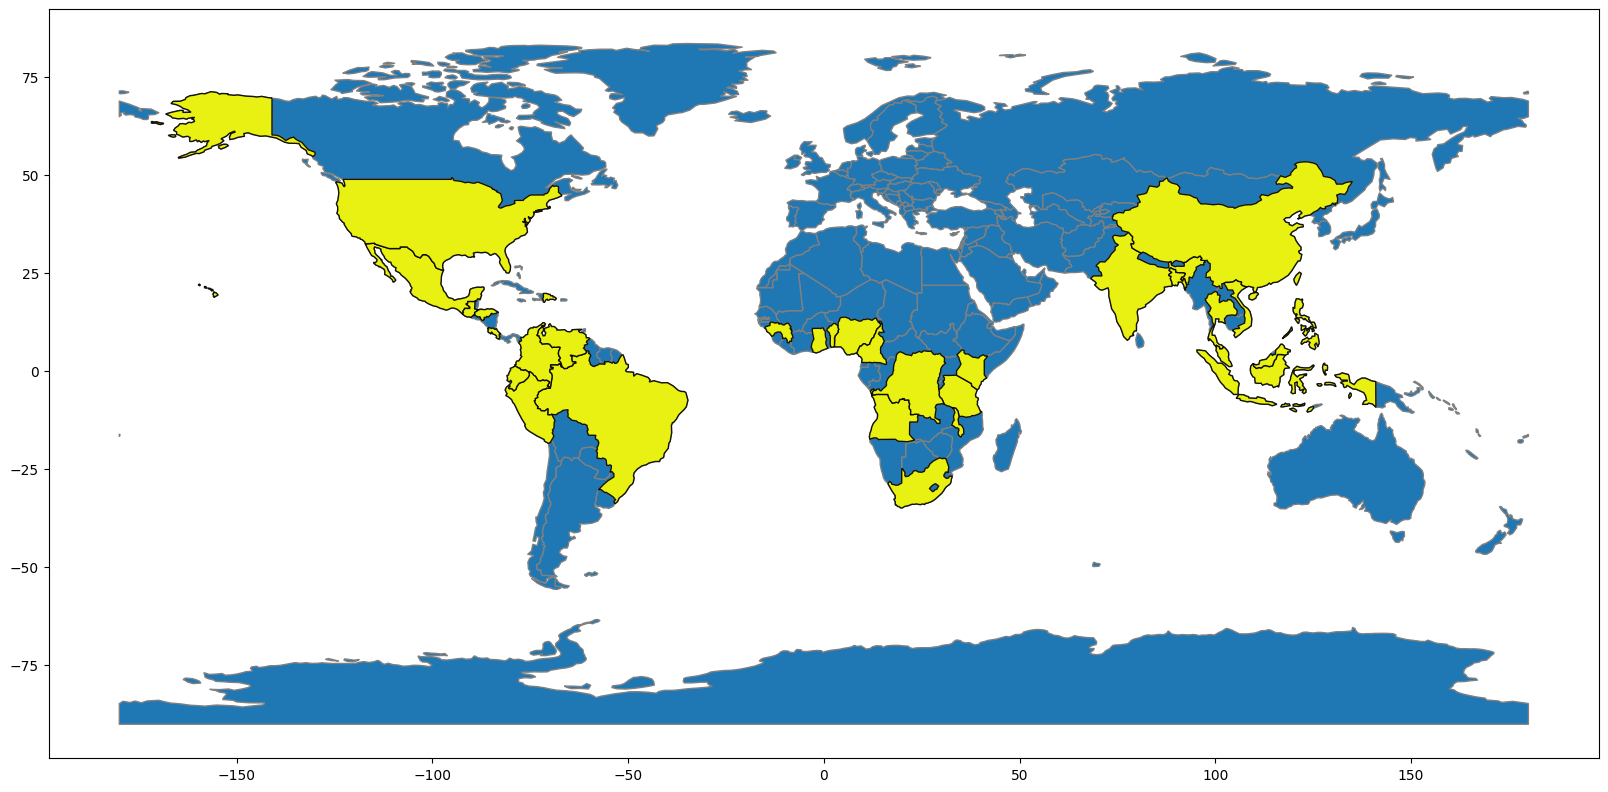

In [1171]:
#reference: https://stackoverflow.com/questions/53142563/coloring-specific-countries-with-geopandas
import shapefile
import descartes
from descartes import PolygonPatch
import matplotlib.pyplot as plt


def plotCountryPatch(country_list, fcolor):
    ax2 = world.plot(figsize=(20,20), edgecolor=u'gray')
# plot a country on the provided axes
    for country_name in country_list:
        nami = world[world.name == country_name]
        namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
        namig0 = {'type': namigm[0]['geometry']['type'],'coordinates': namigm[0]['geometry']['coordinates']}
        ax2.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.9, zorder=2 ))


countrylist = geo_pinproddf['Country']

plotCountryPatch(countrylist, 'yellow')

In [1172]:
def plotCountryPatch( axes, country_name, fcolor, alpha ):
# plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
                'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=alpha, zorder=2 ))

#plot the countries in one dataset yellow and the other green
def plotColorMap(data1, data2):
    # plot world variable
    ax2 = world.plot(figsize=(25,25), edgecolor=u'white')
    country_list1 = data1['Country']
    country_list2 = data2['Country']
    #color countries based on dataset
    for country in country_list1:
            plotCountryPatch(ax2, country, 'yellow',0.9)
    for country in country_list2:
            plotCountryPatch(ax2, country, 'green', 0.6)



    plt.ylabel('Latitude')
    plt.xlabel('Longitude')

    return(plt.show())


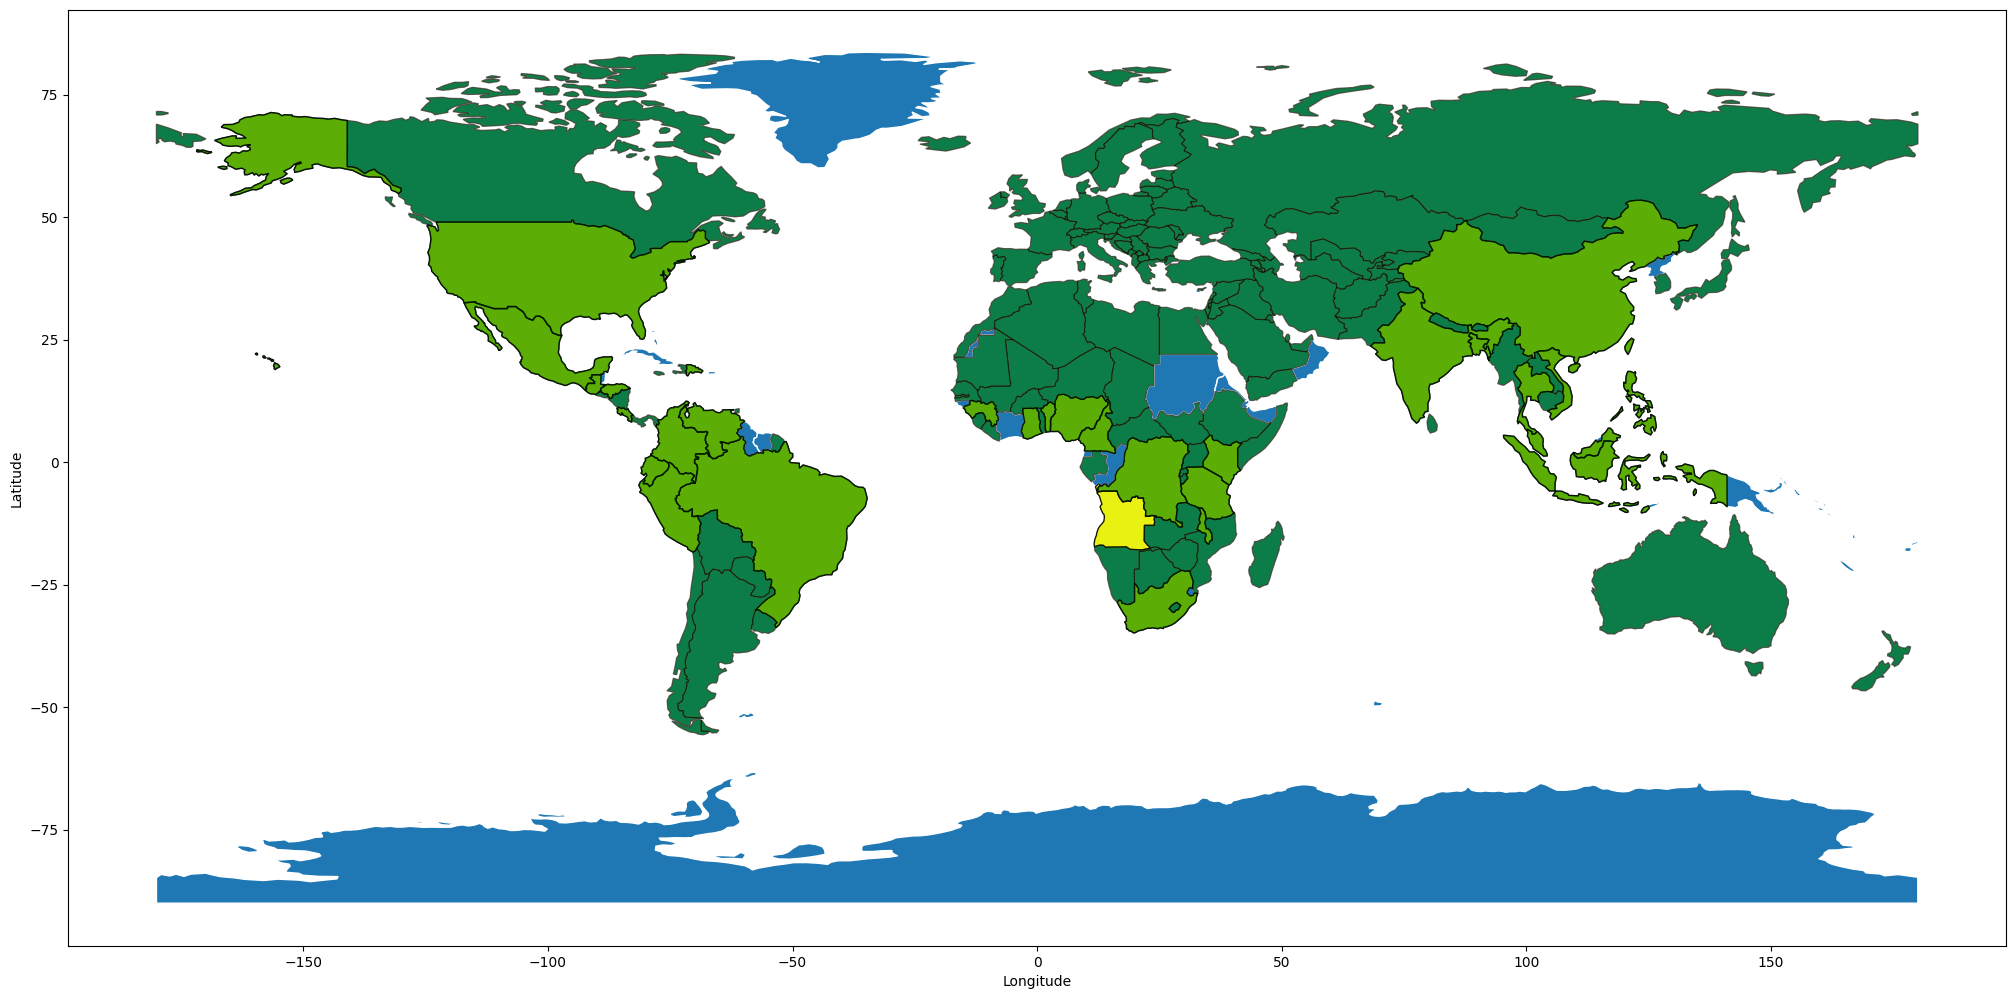

In [1173]:
plotColorMap(geo_pinproddf, geo_pizzadf)